In [36]:
# Run
import matplotlib.pyplot as plt
import pandas as pd
import time
from datetime import datetime
from matplotlib.ticker import FuncFormatter
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os, sys
sys.path.append('..')
from field import read_MS_txt, read_data, read_csv, read_csv_BC, plot_overview, plot_PAH_ACSM, plot_ACSM_BC

In [44]:
def read_ACMS_txt(path, parent_path, labels_list):
    data_dict = {}

    parentPath = os.path.abspath(parent_path)
    if parentPath not in sys.path:
        sys.path.insert(0, parentPath)
    
    files = os.listdir(path)
    
    for label in labels_list:
        label_dict = {}
        for file in files:
            if label in file:
                file_name = file.split('.')[0]
                name = file_name.split('_')[0] + ' ' + file_name.split('_')[1]
            
                with open(os.path.join(path, file)) as f:
                    df = pd.read_table(f, sep = '\t')
                    df.columns = ['time stamp', name]
                    df['time stamp'] = df['time stamp'].str.split().str[1] + pd.Timedelta('2 hours')
                    df['Time'] = pd.to_timedelta(df['time stamp']).astype('timedelta64[s]')     # .str.split().str[1]
                    df = df.set_index('Time')
                    label_dict[name] = df

                merged = pd.DataFrame({'Time':[]})
                for key in label_dict.keys():
                    merged = pd.merge(merged, label_dict[key], on = 'Time', how = 'outer')
                
                for key in merged.keys():
                    merged[key] = merged[key].fillna(0)
                
                data_dict[label] = merged

    return data_dict

In [47]:
# Run
parent_path = '../../../' # How many folders do you have to go back before you are out of the P: drive?

# mass spectra
path_MS = 'L:/PG-Nanoteknologi/PROJEKTER/EPA-asfaltprojekt/On-line PAH Projekt KU/ACSM/txt/mass_spec/'
path_ACSM = 'L:/PG-Nanoteknologi/PROJEKTER/EPA-asfaltprojekt/On-line PAH Projekt KU/ACSM/txt/Org_data/'

MS = read_MS_txt(path_MS, parent_path)
# display(MS.keys())
# display(MS['Trafic_before'].keys())

ACSM_labels = ['org', 'm202', 'm216', 'm226', 'm228', 'm252']
ACSM = read_ACMS_txt(path_ACSM, parent_path, ACSM_labels)
display(ACSM)

KeyError: 'time'

In [39]:
fig, ax = plt.subplots()

ax.plot(ACSM['org'].index, ACSM['org']['Greve 28062023'])
formatter = FuncFormatter(lambda s, x: time.strftime('%H:%M', time.gmtime(s)))
ax.xaxis.set_major_formatter(formatter)

Error in callback <function _draw_all_if_interactive at 0x0000028E3D09D580> (for post_execute):


OSError: [Errno 22] Invalid argument

OSError: [Errno 22] Invalid argument

<Figure size 640x480 with 1 Axes>

In [48]:
# ACSM
path_vesterbrogade = 'L:/PG-Nanoteknologi/Data/ACSM/CSV data/EPA_Vesterbrogade_2023/' # Path to data located on L: drive
path_indiakaj = 'L:/PG-Nanoteknologi/Data/ACSM/CSV data/EPA_Indiakaj_2023/' # Path to data located on L: drive
path_greve = 'L:/PG-Nanoteknologi/Data/ACSM/CSV data/EPA_Greve_2023/' # Path to data located on L: drive

vesterbrogade = read_csv(path_vesterbrogade, parent_path)
indiakaj = read_data(path_indiakaj, parent_path)
greve = read_csv(path_greve, parent_path)

display(vesterbrogade)

{'EPA-vesterbrogade-120623':                                  t_base  m252_11000  m228_11000  m226_11000  \
 Time                                                                          
 0 days 09:49:25  0 days 09:49:25.701635    0.003833    0.007104    0.008325   
 0 days 09:50:05  0 days 09:50:05.703749    0.000467    0.002949    0.001301   
 0 days 09:50:45  0 days 09:50:45.705862    0.001393    0.006051    0.001862   
 0 days 09:51:25  0 days 09:51:25.707975   -0.000745    0.002245    0.000947   
 0 days 09:52:05  0 days 09:52:05.710088    0.001336    0.009507    0.004813   
 ...                                 ...         ...         ...         ...   
 0 days 13:34:37  0 days 13:34:37.782845    0.000913    0.000942   -0.002016   
 0 days 13:35:17  0 days 13:35:17.784958    0.001047    0.001154   -0.000228   
 0 days 13:35:57  0 days 13:35:57.787071    0.001042    0.001799   -0.000873   
 0 days 13:36:37  0 days 13:36:37.789184    0.001940    0.000833    0.001613   
 0 days 13:3

In [49]:
# Black carbon
path_BC_vesterbrogade = 'L:/PG-Nanoteknologi/Data/MA200/Raw data/Vesterbro_asphalt 2023/'
BC_station_vesterbrogade = ['MA200-0353']
path_BC_indiakaj = 'L:/PG-Nanoteknologi/Data/MA200/Raw data/Indiakaj_asphalt 2022/'
BC_station_indiakaj = ['S0052', 'S0055']
path_BC_greve = 'L:/PG-Nanoteknologi/Data/MA200/Raw data/Greve_asphalt_2023/'
BC_station_greve = ['MA200-0285']

BC_vesterbrogade = read_csv_BC(path_BC_vesterbrogade, parent_path, BC_station_vesterbrogade)
BC_indiakaj = read_csv_BC(path_BC_indiakaj, parent_path, BC_station_indiakaj)
BC_greve = read_csv_BC(path_BC_greve, parent_path, BC_station_greve)

print('Vesterbrogade: ', BC_vesterbrogade.keys())
print('Indiakaj: ', BC_indiakaj.keys())
print('Greve: ', BC_greve.keys())

Vesterbrogade:  dict_keys(['230612094700', '230613075200'])
Indiakaj:  dict_keys(['220713081200', '220814063001'])
Greve:  dict_keys(['230627070700', '230628065100'])


In [50]:
# Run
def plot_MS(ax, df, key, ttl):
    width = 0.2

    ax.bar(df['mass'], df[key], width)
    
    ax.set(xlabel = 'm/z', ylabel = 'Intensity', title = ttl)
    # ax.set_xticks(x + 2*width, df['mass'])
    # ax.legend(frameon = False, fontsize = 8)

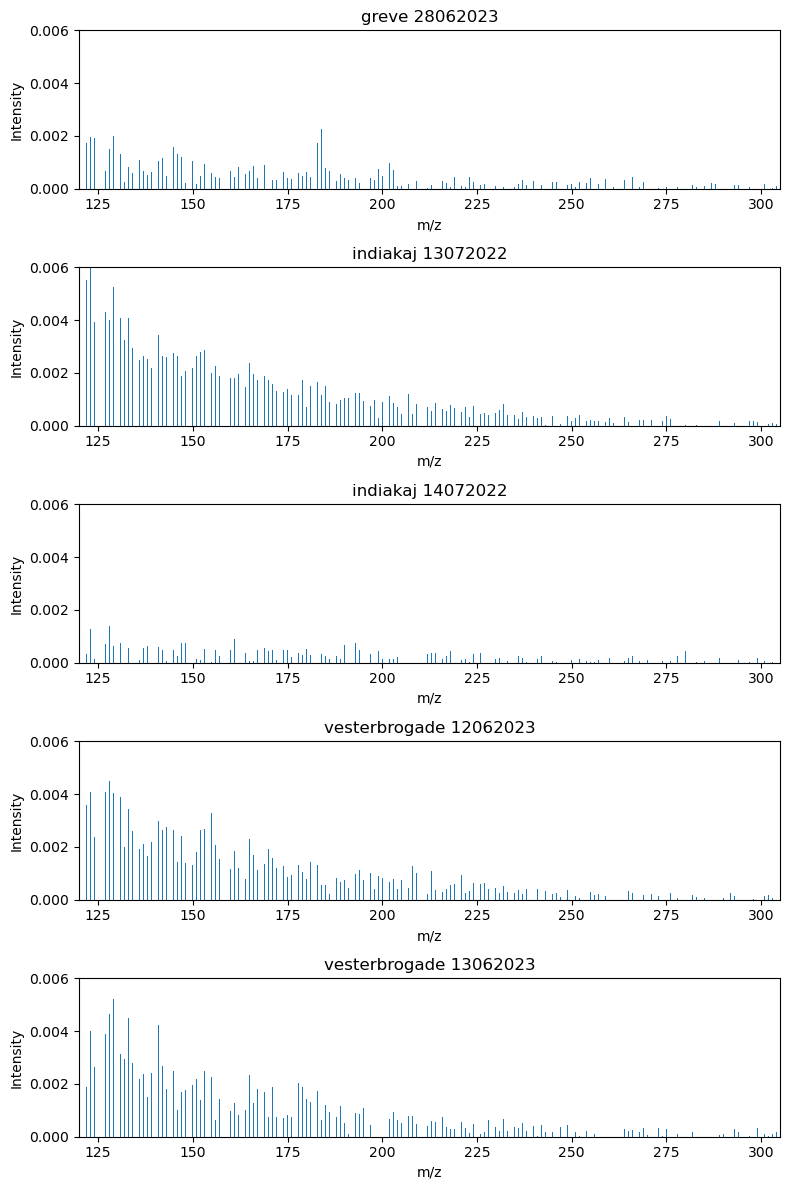

In [20]:
# Run
fig, ax = plt.subplots(5, 1, figsize = (8, 12))

for i, key in enumerate(MS['Trafic_before'].keys()[1:]):
    plot_MS(ax[i], MS['Trafic_before'], key, key)
    ax[i].set(ylim = (0, 0.006), xlim = (120, 305))

fig.tight_layout()
fig.savefig('Field_data/Trafic_before.png', dpi = 600)
plt.show()

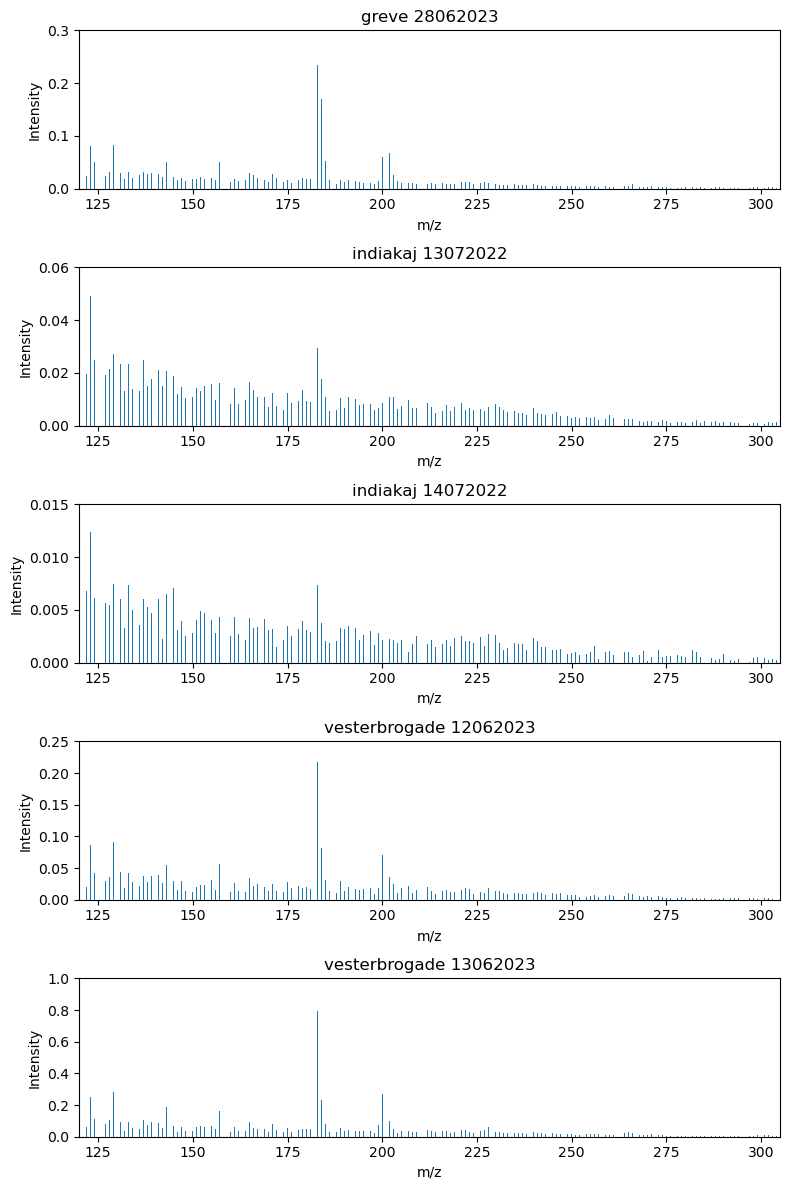

In [51]:
fig, ax = plt.subplots(5, 1, figsize = (8, 12))

for i, key in enumerate(MS['Asphalt_peak'].keys()[1:]):
    plot_MS(ax[i], MS['Asphalt_peak'], key, key)
    ax[i].set(xlim = (120, 305))

ax[0].set_ylim(0, 0.3)
ax[1].set_ylim(0, 0.06)
ax[2].set_ylim(0, 0.015)
ax[3].set_ylim(0, 0.25)
ax[4].set_ylim(0, 1)

fig.tight_layout()
fig.savefig('Field_data/Asphalt_MS_120-305.png', dpi = 600)
plt.show()

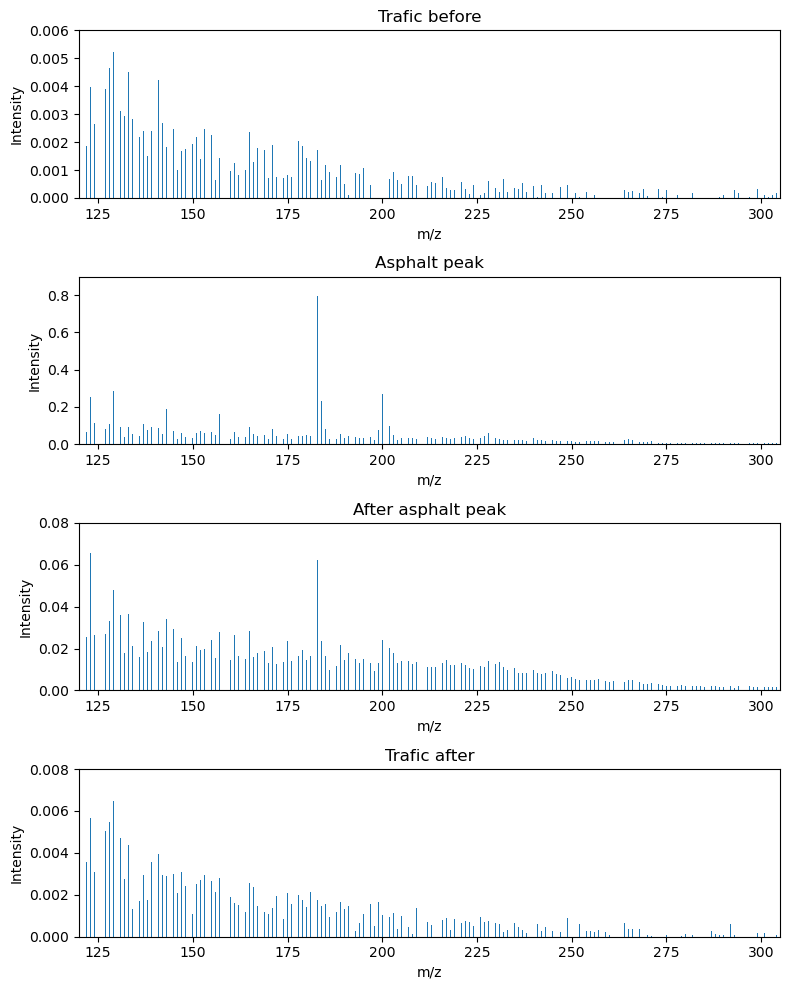

In [26]:
fig, ax = plt.subplots(4, 1, figsize = (8, 10))

plot_MS(ax[0], MS['Trafic_before'], 'vesterbrogade 13062023', 'Trafic before')
plot_MS(ax[1], MS['Asphalt_peak'], 'vesterbrogade 13062023', 'Asphalt peak')
plot_MS(ax[2], MS['After_AP'], 'vesterbrogade 13062023', 'After asphalt peak')
plot_MS(ax[3], MS['Trafic_after'], 'vesterbrogade 13062023', 'Trafic after')
ax[0].set(xlim = (120, 305), ylim = (0, 0.006))
ax[1].set(xlim = (120, 305), ylim = (0, 0.9))
ax[2].set(xlim = (120, 305), ylim = (0, 0.08))
ax[3].set(xlim = (120, 305), ylim = (0, 0.008))

fig.tight_layout()
fig.savefig('Field_data/13062023.png', dpi = 600)
plt.show()

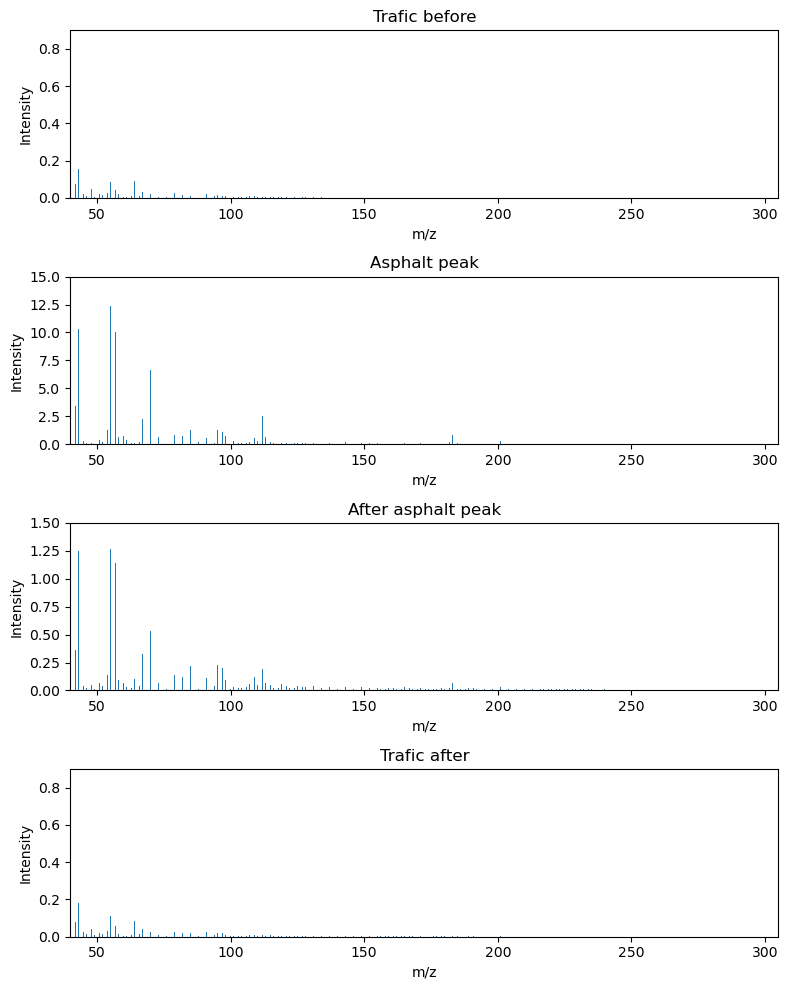

In [41]:
fig, ax = plt.subplots(4, 1, figsize = (8, 10))

plot_MS(ax[0], MS['Trafic_before'], 'vesterbrogade 13062023', 'Trafic before')
plot_MS(ax[1], MS['Asphalt_peak'], 'vesterbrogade 13062023', 'Asphalt peak')
plot_MS(ax[2], MS['After_AP'], 'vesterbrogade 13062023', 'After asphalt peak')
plot_MS(ax[3], MS['Trafic_after'], 'vesterbrogade 13062023', 'Trafic after')
ax[0].set(xlim = (40, 305), ylim = (0, 0.9))
ax[1].set(xlim = (40, 305), ylim = (0, 15))
ax[2].set(xlim = (40, 305), ylim = (0, 1.5))
ax[3].set(xlim = (40, 305), ylim = (0, 0.9))

fig.tight_layout()
fig.savefig('Field_data/13062023_40.png', dpi = 600)
plt.show()

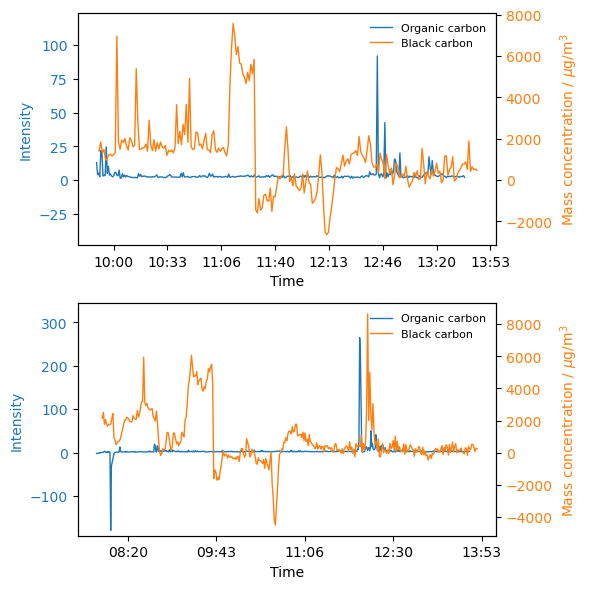

In [3]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_ACSM_BC(ax[0], vesterbrogade['EPA-vesterbrogade-120623'], BC_vesterbrogade['230612094700'], 2)
plot_ACSM_BC(ax[1], vesterbrogade['EPA-vesterbrogade-130623'], BC_vesterbrogade['230613075200'][:-2], 1.5)

fig.tight_layout()
fig.savefig('Field_data/vesterbrogade_ACSM_BC.png', dpi = 600)
plt.show()

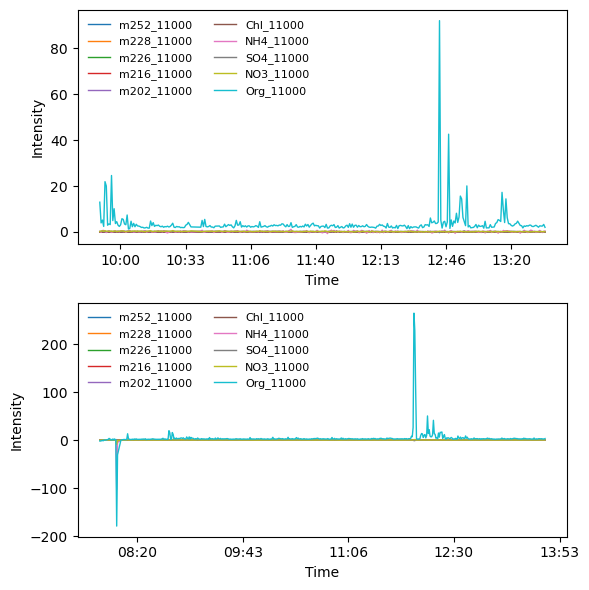

In [4]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_overview(ax[0], vesterbrogade['EPA-vesterbrogade-120623'], 2)
plot_overview(ax[1], vesterbrogade['EPA-vesterbrogade-130623'], 2)

fig.tight_layout()
fig.savefig('Field_data/EPA_vesterbrogade.png', dpi = 600)

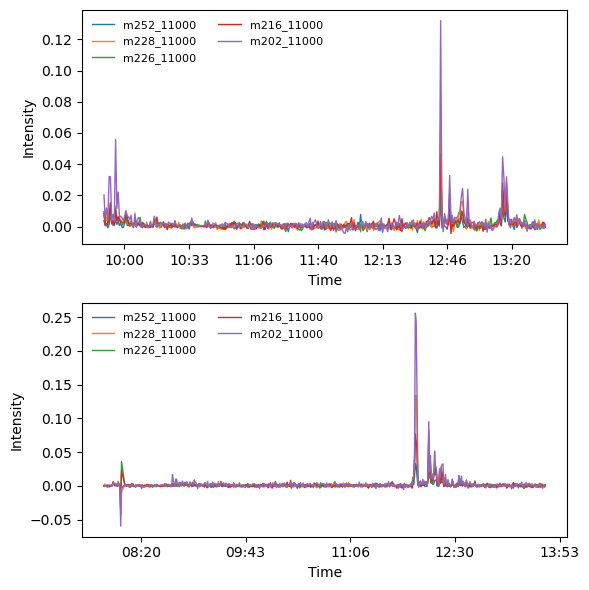

In [5]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_PAH_ACSM(ax[0], vesterbrogade['EPA-vesterbrogade-120623'], 2)
plot_PAH_ACSM(ax[1], vesterbrogade['EPA-vesterbrogade-130623'], 2)

fig.tight_layout()
fig.savefig('Field_data/EPA_vesterbrogade_PAH.png', dpi = 600)

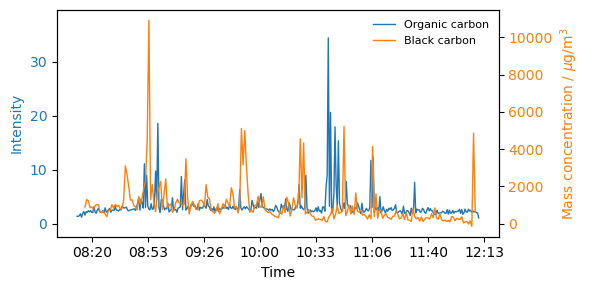

In [6]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_ACSM_BC(ax, indiakaj['EPA-indiakaj-130722'][5:], BC_indiakaj['220713081200'], 15)

fig.tight_layout()
fig.savefig('Field_data/indiakaj_ACSM_BC.png', dpi = 600)
plt.show()

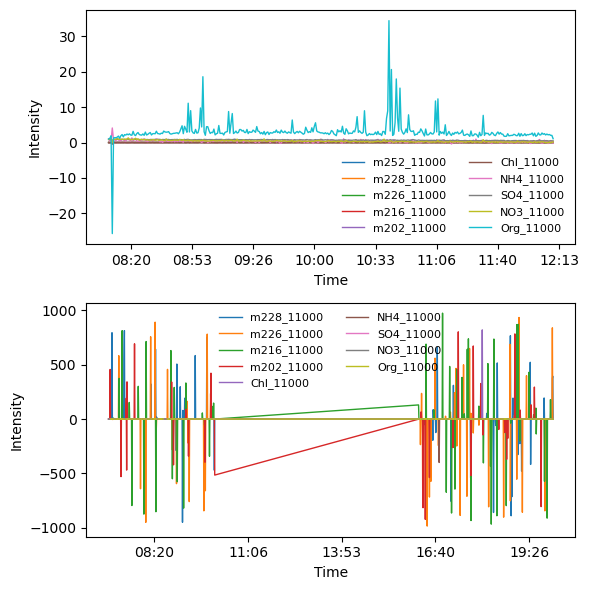

In [7]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_overview(ax[0], indiakaj['EPA-indiakaj-130722'], 2)
plot_overview(ax[1], indiakaj['EPA-indiakaj-140722'], 2)

fig.tight_layout()
fig.savefig('Field_data/EPA_indiakaj.png', dpi = 600)

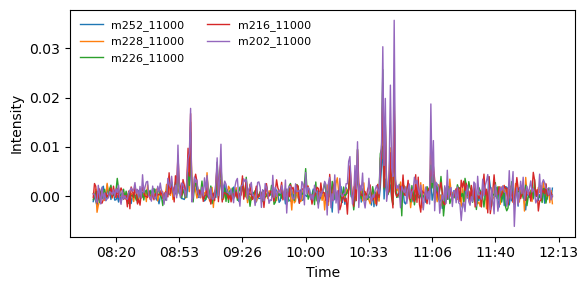

In [8]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_PAH_ACSM(ax, indiakaj['EPA-indiakaj-130722'], 2)

fig.tight_layout()
fig.savefig('Field_data/EPA_indiakaj_PAH.png', dpi = 600)

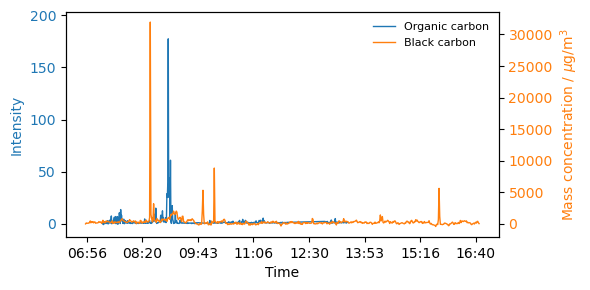

In [9]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_ACSM_BC(ax, greve['EPA-greve-280623'][5:], BC_greve['230628065100'], 15)

fig.tight_layout()
fig.savefig('Field_data/greve_ACSM_BC.png', dpi = 600)
plt.show()

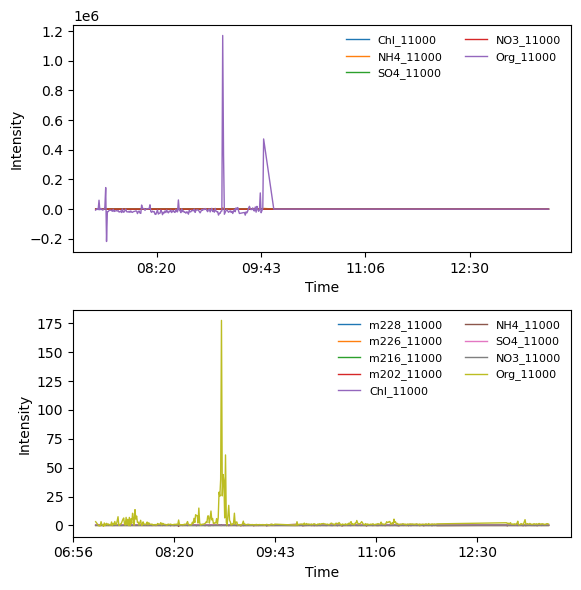

In [10]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_overview(ax[0], greve['EPA-greve-270623'], 2)
plot_overview(ax[1], greve['EPA-greve-280623'], 2)

fig.tight_layout()
fig.savefig('Field_data/EPA_greve.png', dpi = 600)

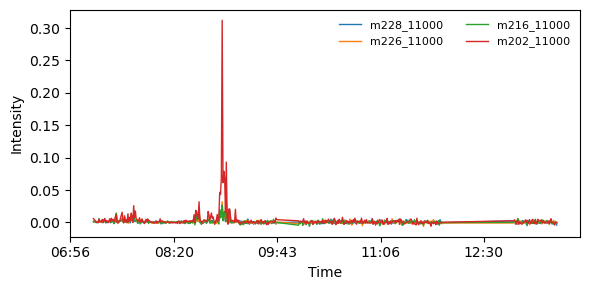

In [11]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_PAH_ACSM(ax, greve['EPA-greve-280623'], 2)

fig.tight_layout()
fig.savefig('Field_data/EPA_greve_PAH.png', dpi = 600)